In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [12]:
# Step 1: Load the dataset
customers_df = pd.read_csv('/Users/agnes/Downloads/ML/Assignment 4/customers.csv')
customers_df.head()

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Step 2: Select numerical columns and apply Z-score normalization
numerical_columns = ['Age', 'Income', 'Score']
scaler = StandardScaler()
customers_df[numerical_columns] = scaler.fit_transform(customers_df[numerical_columns])
customers_df.head()

,ID,Gender,Age,Income,Score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


Best k value: 4


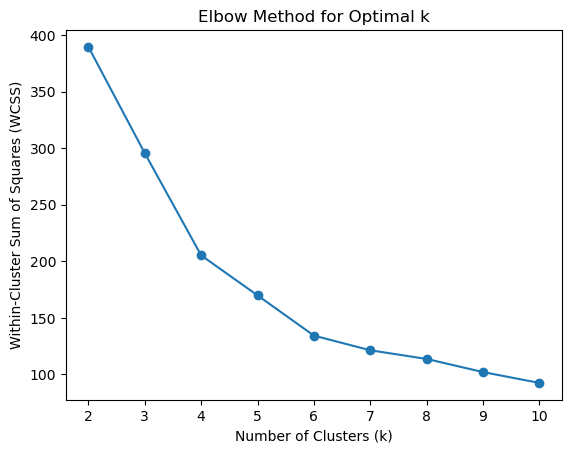

In [19]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define the range of k values
k_values = range(2, 11)

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_df[['Age', 'Income', 'Score']])
    wcss.append(kmeans.inertia_)
    
best_k_index = 1
for i in range(1, len(wcss)-1):
    if (wcss[i] - wcss[i+1]) / (wcss[i-1] - wcss[i]) < 0.5:
        best_k_index = i
        break

best_k = k_values[best_k_index]
print("Best k value:", best_k)

# Plot the WCSS for each value of k
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.show()


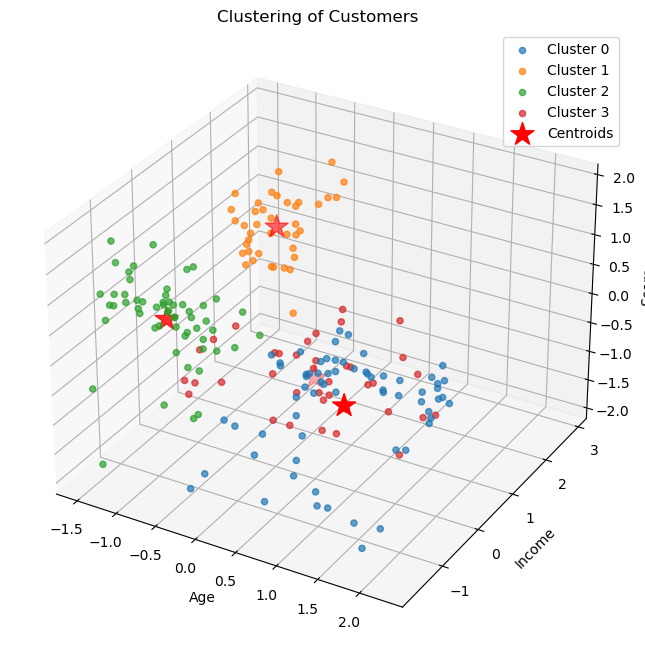

In [22]:
# Define the best k value obtained from the elbow method
best_k = 4  # Change this to the value obtained from the elbow method

# Perform K-means clustering with the best k value
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(customers_df[['Age', 'Income', 'Score']])

# Get cluster labels for each sample
cluster_labels = kmeans.labels_

# Denormalize the data
scaler = StandardScaler()
customers_df[['Age', 'Income', 'Score']] = scaler.fit_transform(customers_df[['Age', 'Income', 'Score']])
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot clusters and centroids in 3D with denormalized axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(best_k):
    cluster_points = customers_df[cluster_labels == cluster]
    ax.scatter(cluster_points['Age'], cluster_points['Income'], cluster_points['Score'], label=f'Cluster {cluster}', alpha=0.7)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=300, label='Centroids')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
plt.title('Clustering of Customers')
plt.legend()
plt.show()


Best k value for (Age, Income): 3
Best k value for (Age, Score): 5
Best k value for (Income, Score): 3


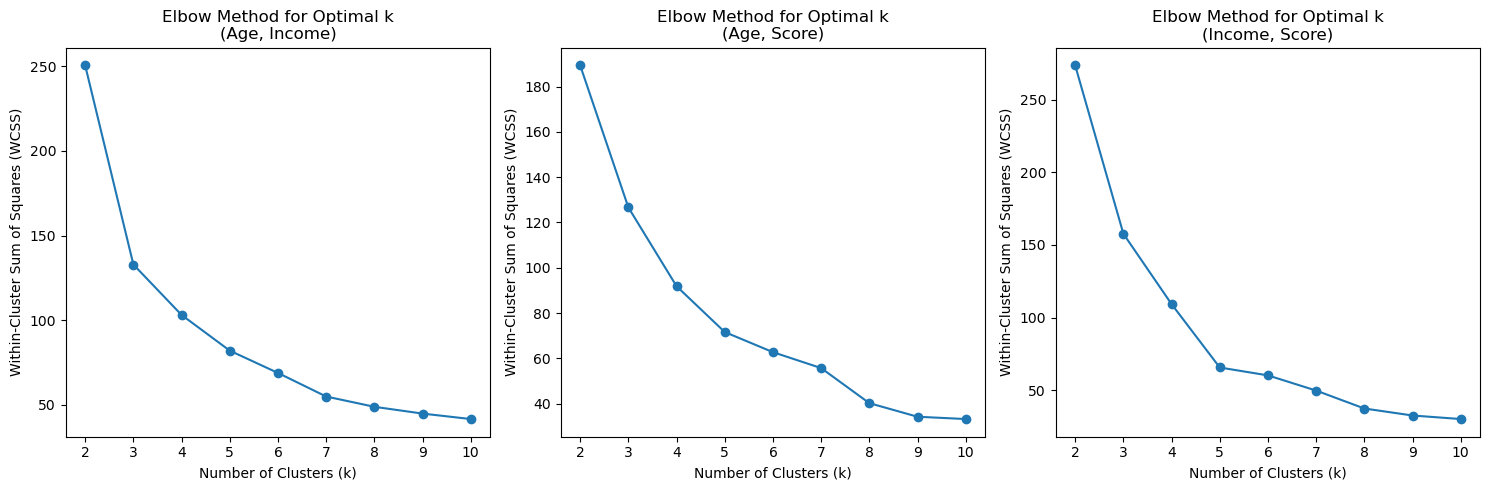

In [29]:
# Define the combinations of features
feature_combinations = [('Age', 'Income'), ('Age', 'Score'), ('Income', 'Score')]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(feature_combinations), figsize=(15, 5))

# Loop over each feature combination
for i, features in enumerate(feature_combinations):
    # Extract the features
    dataset = customers_df[list(features)]

    # Initialize an empty list to store the within-cluster sum of squares (WCSS)
    wcss = []

    # Define the range of k values
    k_values = range(2, 11)

    # Perform K-means clustering for each value of k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS for each value of k
    axes[i].plot(k_values, wcss, marker='o')
    axes[i].set_title(f'Elbow Method for Optimal k\n({features[0]}, {features[1]})')
    axes[i].set_xlabel('Number of Clusters (k)')
    axes[i].set_ylabel('Within-Cluster Sum of Squares (WCSS)')
    axes[i].set_xticks(k_values)
    
    # Find the best k value based on the elbow method
    best_k_index = 1
    for j in range(1, len(wcss)-1):
        if (wcss[j] - wcss[j+1]) / (wcss[j-1] - wcss[j]) < 0.5:
            best_k_index = j
            break

    best_k = k_values[best_k_index]
    print(f"Best k value for ({features[0]}, {features[1]}):", best_k)

plt.tight_layout()
plt.show()


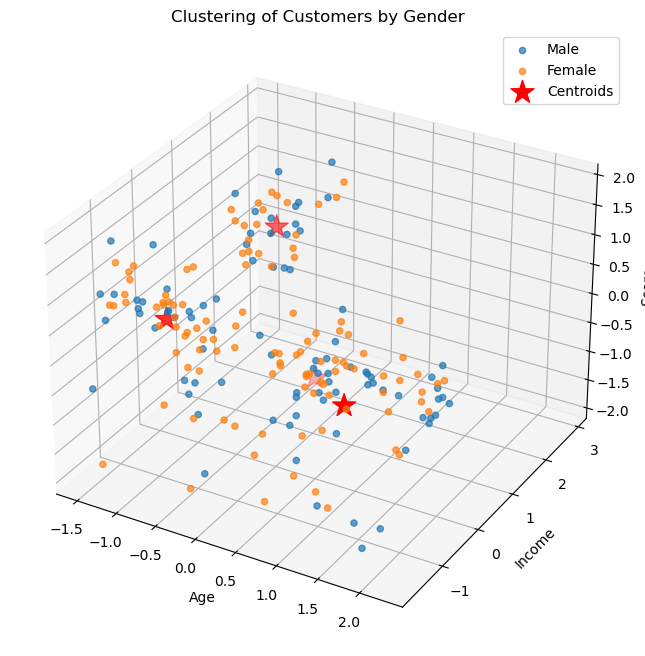

In [24]:
# Define the features and target
features = ['Age', 'Income', 'Score']
target = 'Gender'

# Perform K-means clustering with the best k value (e.g., best_k = 4)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(customers_df[features])

# Get cluster labels for each sample
cluster_labels = kmeans.labels_

# Plot clusters and distinguish data points based on 'Gender'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each gender
for gender in customers_df[target].unique():
    gender_data = customers_df[customers_df[target] == gender]
    ax.scatter(gender_data['Age'], gender_data['Income'], gender_data['Score'], label=gender, alpha=0.7)

# Plot centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=300, label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
plt.title('Clustering of Customers by Gender')
plt.legend()
plt.show()


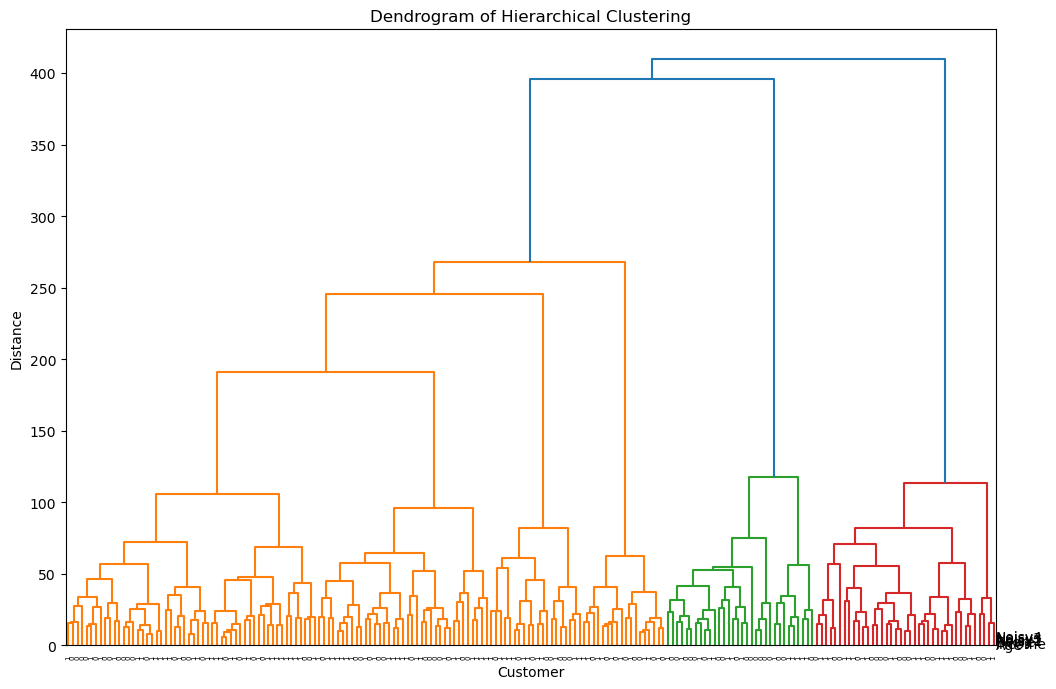

In [27]:
# Extract features and target
X = customers_noisy_df.drop(columns=['Gender'])
labels = customers_noisy_df['Gender']  # Assuming 'Gender' is the target variable

# Compute the linkage matrix
linkage_matrix = linkage(X, method='ward')  # You can use different linkage methods like 'single', 'complete', 'average', etc.

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=labels.values, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Annotate with feature names
feature_names = X.columns
for i, feature_name in enumerate(feature_names):
    plt.text(2000, i, feature_name, va='center')

plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.show()

